<a href="https://colab.research.google.com/github/arshbm/Merck_pricing/blob/main/5th_May_Merck_France_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Adding another cell to check

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [3]:
data = pd.read_excel('/content/Training Data v0.1.xlsx', sheet_name='Consolidated data', header = 4).iloc[0:, 1:58]

In [4]:
# prompt: write a code to select only the user-defined columns in the data

# Filter for rows where market is either France, Italy, or Germany
data = data[data['Market'].isin(['France'])]

# Select specific columns
selected_columns = [
# 'Asset ',
'short Indication',
'EMA approved',
'First-in-class',
'Comparator arm',
'PFS HR',
'OS HR',
'Asset mPFS (months)',
'Asset mOS (months)',
'mPFS (months)',
'mOS (months)',
'Level of Unmet Need',
'Incidence per 100k (EPAR)',
'Orphan Drug Designation',
'Reimbursement Status'
] # Example columns, replace with your desired columns
data = data[selected_columns]

data = data[data['Reimbursement Status'] != 'Reimbursement decision pending']




In [5]:
import pandas as pd
import numpy as np

# Define missing values (already in uppercase for comparison)
missing_values = {"N.R.", "NR", "N/A", "NA", "NOT REPORTED", "NE"}

# List of columns to clean
cols_to_clean = ['Asset mPFS (months)', 'Asset mOS (months)', 'mPFS (months)', 'mOS (months)']

for col in cols_to_clean:
    # Convert to uppercase, strip whitespace, then replace
    data[col] = data[col].astype(str).str.upper().str.strip()
    data[col] = data[col].replace(missing_values, np.nan)

    # Optionally, convert to float if numeric values are expected
    data[col] = pd.to_numeric(data[col], errors='coerce')
# ... (rest of your code)


In [ ]:
# prompt: Write a code that performs label encoding on certain columns specified by the user on the data dataframe


# Specify the columns you want to label encode
columns_to_encode = [
'Asset ',
'short Indication',
'Market',
'EMA approved',
'First-in-class',
'Comparator arm',
'Active comparator (branded or generic)',
'Active comparator type',
'Level of Unmet Need',
'Appropriate comparator therapy',
'Relative Population Size',
'Mono vs combination therapy',
'Orphan Drug Designation',
'Final Scope for Analysis',
'Reimbursement Status'
] # Replace with your actual column names


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the specified columns and apply label encoding
for column in columns_to_encode:
  if column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
  else:
    print(f"Warning: Column '{column}' not found in the DataFrame.")

data.head()


In [ ]:
data.loc[data['Comparator arm'] == 'Single arm', :]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight


In [ ]:
data.head()

In [8]:
x = data.drop(columns=['Reimbursement Status'])
y = data['Reimbursement Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
sample_weights = np.where(y_train == 0, 1, 1)

for n in range(1,20):
    clf = DecisionTreeClassifier(random_state=42, max_depth = n, min_samples_split=10, min_impurity_decrease=0.015)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
    clf.fit(x, y)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    y_pred_overall = clf.predict(x)
    overall_accuracy = accuracy_score(y, y_pred_overall)
    print(f"Tree Depth: {n}; Training Accuracy: {train_accuracy * 100:.2f}%; Testing Accuracy: {test_accuracy* 100:.2f}%; \
Overall Accuracy: {overall_accuracy*100:.2f}% ")



Tree Depth: 1; Training Accuracy: 79.31%; Testing Accuracy: 76.67%; Overall Accuracy: 78.77% 
Tree Depth: 2; Training Accuracy: 79.31%; Testing Accuracy: 76.67%; Overall Accuracy: 78.77% 
Tree Depth: 3; Training Accuracy: 83.62%; Testing Accuracy: 86.67%; Overall Accuracy: 84.25% 
Tree Depth: 4; Training Accuracy: 83.62%; Testing Accuracy: 86.67%; Overall Accuracy: 84.25% 
Tree Depth: 5; Training Accuracy: 86.21%; Testing Accuracy: 86.67%; Overall Accuracy: 86.30% 
Tree Depth: 6; Training Accuracy: 88.79%; Testing Accuracy: 80.00%; Overall Accuracy: 86.99% 
Tree Depth: 7; Training Accuracy: 90.52%; Testing Accuracy: 90.00%; Overall Accuracy: 90.41% 
Tree Depth: 8; Training Accuracy: 90.52%; Testing Accuracy: 90.00%; Overall Accuracy: 90.41% 
Tree Depth: 9; Training Accuracy: 90.52%; Testing Accuracy: 90.00%; Overall Accuracy: 90.41% 
Tree Depth: 10; Training Accuracy: 90.52%; Testing Accuracy: 90.00%; Overall Accuracy: 90.41% 
Tree Depth: 11; Training Accuracy: 90.52%; Testing Accuracy

In [10]:
for i in range(1,10):
  clf = DecisionTreeClassifier(random_state=42, max_depth = i, min_samples_split=7)
  scores = cross_val_score(clf, x, y, cv=5)  # 5-fold cross-validation

  print("Accuracy scores for each fold:", scores)
  print("Average accuracy:", scores.mean())


Accuracy scores for each fold: [0.73333333 0.75862069 0.75862069 0.72413793 0.72413793]
Average accuracy: 0.7397701149425286
Accuracy scores for each fold: [0.66666667 0.75862069 0.75862069 0.72413793 0.72413793]
Average accuracy: 0.7264367816091953
Accuracy scores for each fold: [0.73333333 0.62068966 0.75862069 0.72413793 0.75862069]
Average accuracy: 0.7190804597701149
Accuracy scores for each fold: [0.66666667 0.62068966 0.75862069 0.82758621 0.86206897]
Average accuracy: 0.7471264367816092
Accuracy scores for each fold: [0.66666667 0.55172414 0.65517241 0.79310345 0.79310345]
Average accuracy: 0.6919540229885058
Accuracy scores for each fold: [0.66666667 0.48275862 0.62068966 0.79310345 0.79310345]
Average accuracy: 0.6712643678160919
Accuracy scores for each fold: [0.66666667 0.44827586 0.65517241 0.79310345 0.75862069]
Average accuracy: 0.664367816091954
Accuracy scores for each fold: [0.63333333 0.44827586 0.55172414 0.79310345 0.75862069]
Average accuracy: 0.6370114942528735
A

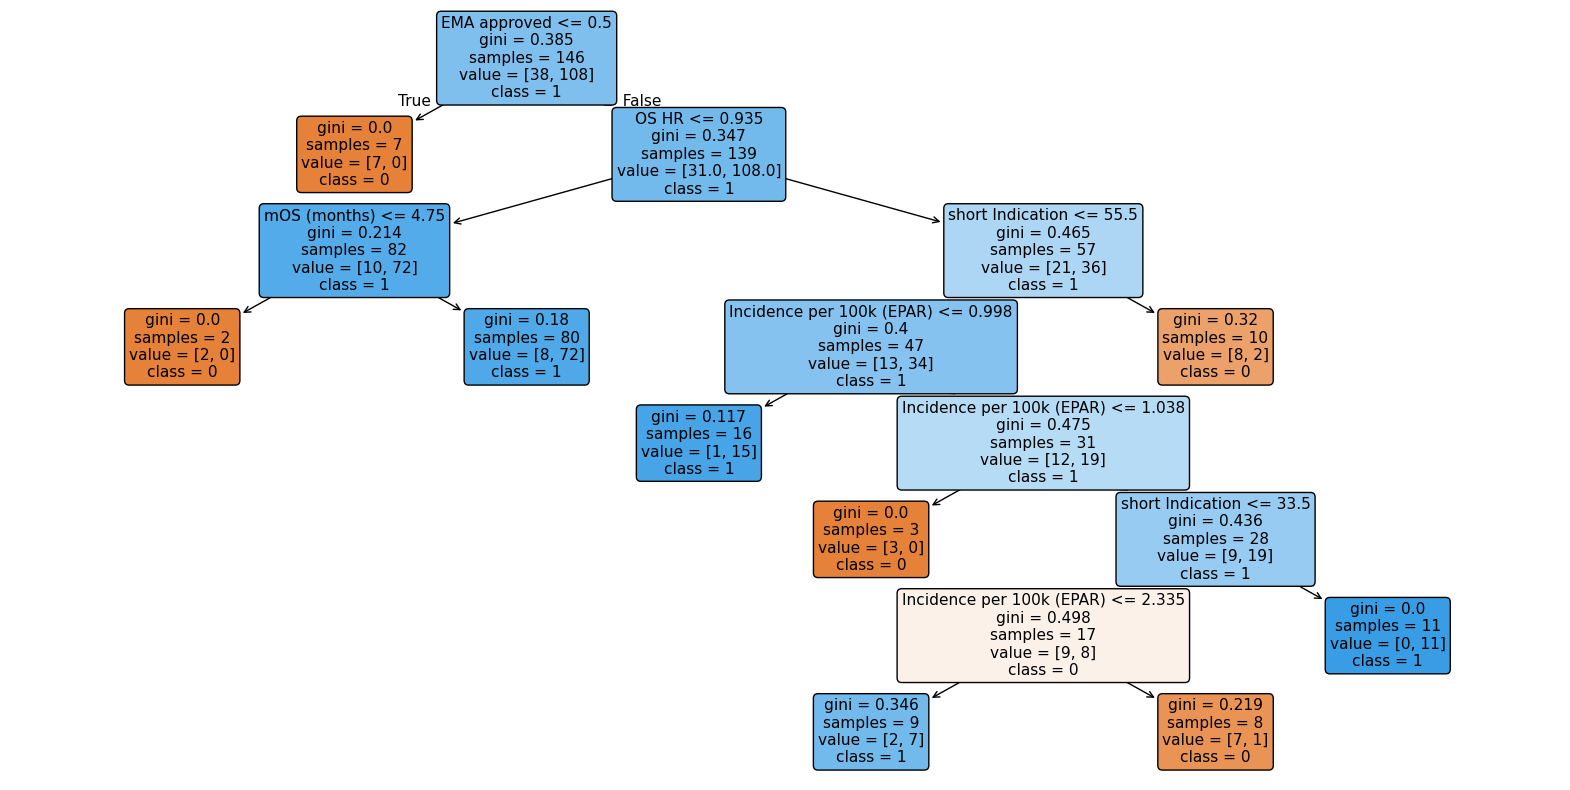

In [9]:
# prompt: Can you help visualize the tree?

import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained DecisionTreeClassifier from the previous code
# and you want to visualize the tree with the best depth
best_depth = 1 # Replace with the actual best depth based on your accuracy results
clf = DecisionTreeClassifier(random_state=42, max_depth = 7, min_samples_split=10, min_impurity_decrease=0.015)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
clf.fit(x, y)

plt.figure(figsize=(20,10)) # Adjust figure size as needed
plot_tree(clf, feature_names=x.columns, class_names=np.unique(y).astype(str), filled=True, rounded=True)
plt.show()


In [15]:
# prompt: Print the short indication and the label assigned to it

import pandas as pd

# Assuming 'data' DataFrame is already loaded and processed as in your previous code
data2 = pd.read_excel('/content/Training Data v0.1.xlsx', sheet_name='Consolidated data', header = 4).iloc[0:, 1:58]
data2 = data2[data2['Market'].isin(['France'])]
data = data[data['Reimbursement Status'] != 'Reimbursement decision pending']

import pandas as pd

# ... (your existing code to load and filter data and data2) ...

# Store the label mapping before encoding
# Assuming columns_to_encode and label_encoder are defined earlier in your notebook
label_mappings = {}  # Dictionary to store the mappings

# Iterate through the specified columns and apply label encoding, storing mappings
for column in columns_to_encode:
    if column in data2.columns:
        # Fit and transform on the original data (data2) to create the mapping
        data2[column] = label_encoder.fit_transform(data2[column])
        # Store the mapping for this column
        label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame.")

# ... (rest of your code) ...

# Access and print the label mapping for 'short Indication'
short_indication_mapping = label_mappings['short Indication']

# Create a DataFrame from the mapping
short_indication_df = pd.DataFrame(list(short_indication_mapping.items()), columns=['Short Indication', 'Label'])

# Save the DataFrame to an Excel file
short_indication_df.to_excel('short_indication_mapping.xlsx', index=False)

print("Label mapping for 'short Indication' saved to 'short_indication_mapping.xlsx'")




Label mapping for 'short Indication' saved to 'short_indication_mapping.xlsx'


In [ ]:
# prompt: can you make a confusion matrix of this

import numpy as np
# Assuming 'clf' is your trained DecisionTreeClassifier and 'x_test', 'y_test' are your test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#3 xgboost+gridsearch
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators = 5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
param_grid = {
    'max_depth': list(range(3, 9)),
    'min_samples_split': list(range(2, 12)),
    'criterion': ['gini', 'entropy'],
    'n_estimators': list(range(5, 7))
}


random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators = 5),
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_

print("Best Params:", random_search.best_params_)
print("Best Accuracy:", accuracy_score(y_test, best_model.predict(x_test)))

In [49]:
from sklearn.tree import DecisionTreeRegressor
mimic_tree = DecisionTreeRegressor(random_state=42, max_depth = 7, min_samples_split=10)  # Limit depth to keep it interpretable
xg_preds = best_model.predict_proba(x_train)
# Use xg_preds[:, 1] to select probabilities for the second class for all samples
mimic_tree.fit(x_train,xg_preds[:, 1]) # Changed from xg_preds[1] to xg_preds[:, 1]
y_pred = mimic_tree.predict(x_train)
error = y_pred - xg_preds[:, 1]
rmse = np.sqrt(np.mean(error ** 2))
print("RMSE:", rmse)


RMSE: 0.09290885810537404


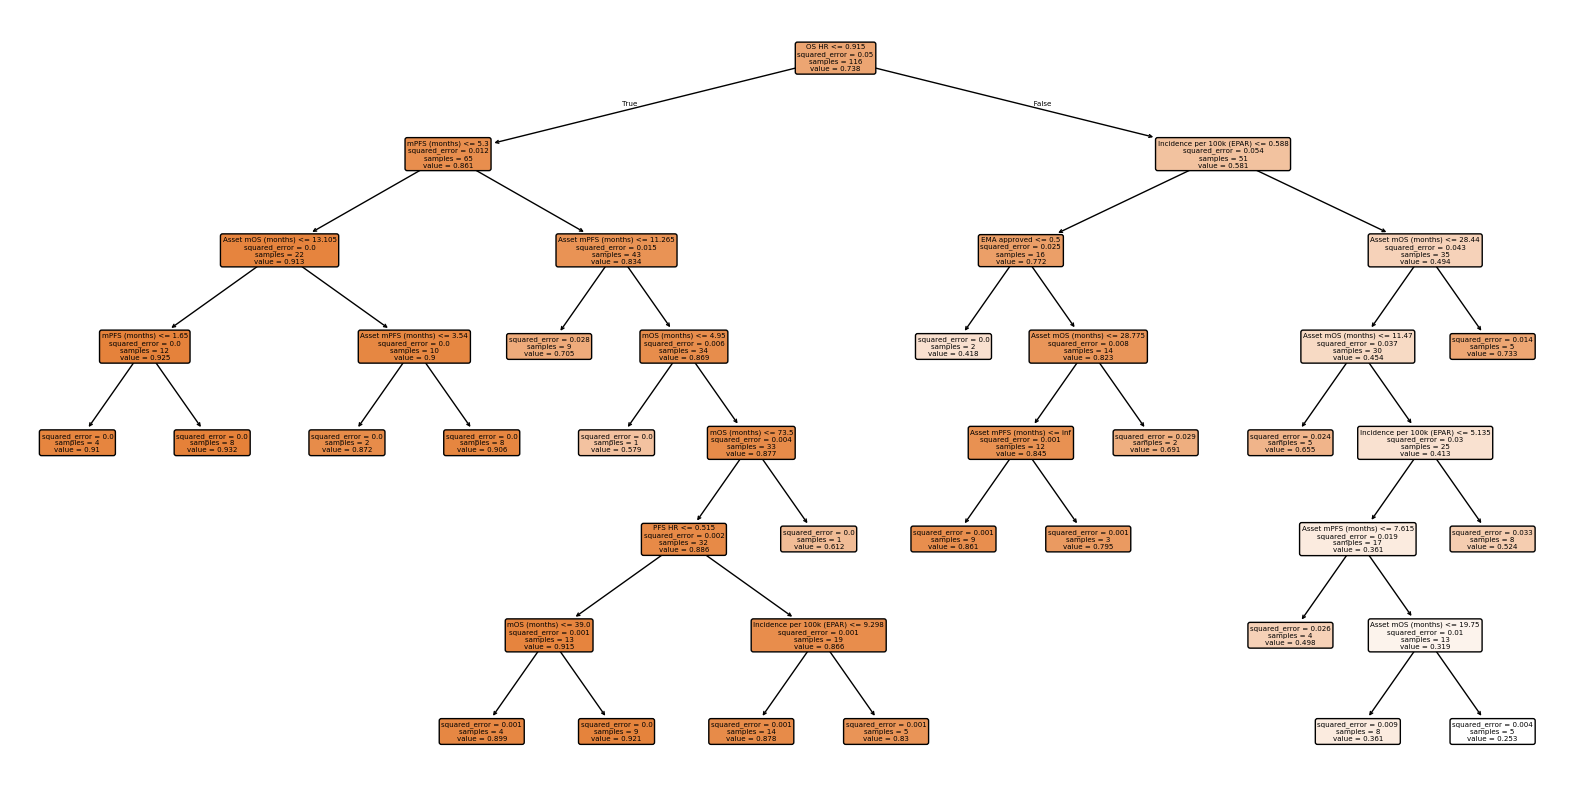

In [43]:
# prompt: Can you help visualize the tree?

import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust figure size as needed
plot_tree(mimic_tree, feature_names=x.columns, class_names=["class 0", "class 1"],filled=True, rounded=True)
plt.show()


In [20]:
from xgboost import Booster
import xgboost as xgb
import numpy as np
import graphviz

# Get booster from trained model
booster: Booster = best_model.get_booster()

# Dump model with stats (gives raw tree structure)
model_dump = booster.get_dump(with_stats=True, dump_format='json')

# Pick the first tree
import json
tree = json.loads(model_dump[0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def traverse_and_convert(node):
    if 'leaf' in node:
        log_odds = node['leaf']
        node['leaf'] = round(sigmoid(log_odds), 4)  # Convert log-odds to prob
    else:
        traverse_and_convert(node['children'][0])
        traverse_and_convert(node['children'][1])

# Convert log-odds to probabilities
traverse_and_convert(tree)

def render_tree(node, dot=None, node_id=0):
    if dot is None:
        dot = graphviz.Digraph()

    current_id = node_id
    if 'leaf' in node:
        label = f"Leaf\nP={node['leaf']}"
        dot.node(str(current_id), label=label, shape='box', style='filled', color='lightblue')
    else:
        label = f"{node['split']} < {round(node['split_condition'], 4)}\nGain={round(node['gain'], 4)}"
        dot.node(str(current_id), label=label)
        for i, child in enumerate(node['children']):
            child_id = current_id * 2 + i + 1
            dot.edge(str(current_id), str(child_id), label='Yes' if i == 0 else 'No')
            render_tree(child, dot, child_id)

    return dot

# Create and render the tree
dot = render_tree(tree)
dot.render("xgb_tree_prob", format='png', cleanup=True)  # Saves to 'xgb_tree_prob.png'

'xgb_tree_prob.png'

Adding Probabilities in Excel

In [126]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 6, min_samples_split=10, min_impurity_decrease=0.015)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
clf.fit(x, y)
final_data = pd.read_excel('/content/Training Data v0.1.xlsx', sheet_name='Consolidated data', header = 4).iloc[0:, 1:58]
# Filter for rows where market is either France, Italy, or Germany
final_data = final_data[final_data['Market'].isin(['France'])]
# prompt: write a code to select only the user-defined columns in the data
selected_columns = [
'Asset ',
'short Indication',
'EMA approved',
'First-in-class',
'Comparator arm',
'PFS HR',
'OS HR',
'Asset mPFS (months)',
'Asset mOS (months)',
'mPFS (months)',
'mOS (months)',
'Level of Unmet Need',
'Incidence per 100k (EPAR)',
'Orphan Drug Designation',
'Reimbursement Status'
] # Example columns, replace with your desired columns

final_data = final_data[selected_columns]


final_data = final_data[final_data['Reimbursement Status'] != 'Reimbursement decision pending']


In [127]:
final_data[['Y_0_xg', 'Y_1_xg']] = best_model.predict_proba(x)
final_data[['Y_0_dt', 'Y_1_dt']] = clf.predict_proba(x)
final_data['mimic_tree'] = mimic_tree.predict(x)
# prompt: save final data in as an excel

# Assuming 'final_data' DataFrame is already created as in your provided code.

# Save the DataFrame to an Excel file
final_data.to_excel('Consolidated.xlsx', index=False)  # 'index=False' prevents writing row indices to the file

#Optional: Display a message to confirm the file was saved
print("Final data saved to 'final_data.xlsx'")

Final data saved to 'final_data.xlsx'


In [ ]:
x_train.to_excel('x_train1.xlsx', index=False)


In [52]:
y_pred = best_model.predict(x)
print(accuracy_score(y, y_pred))

0.8972602739726028


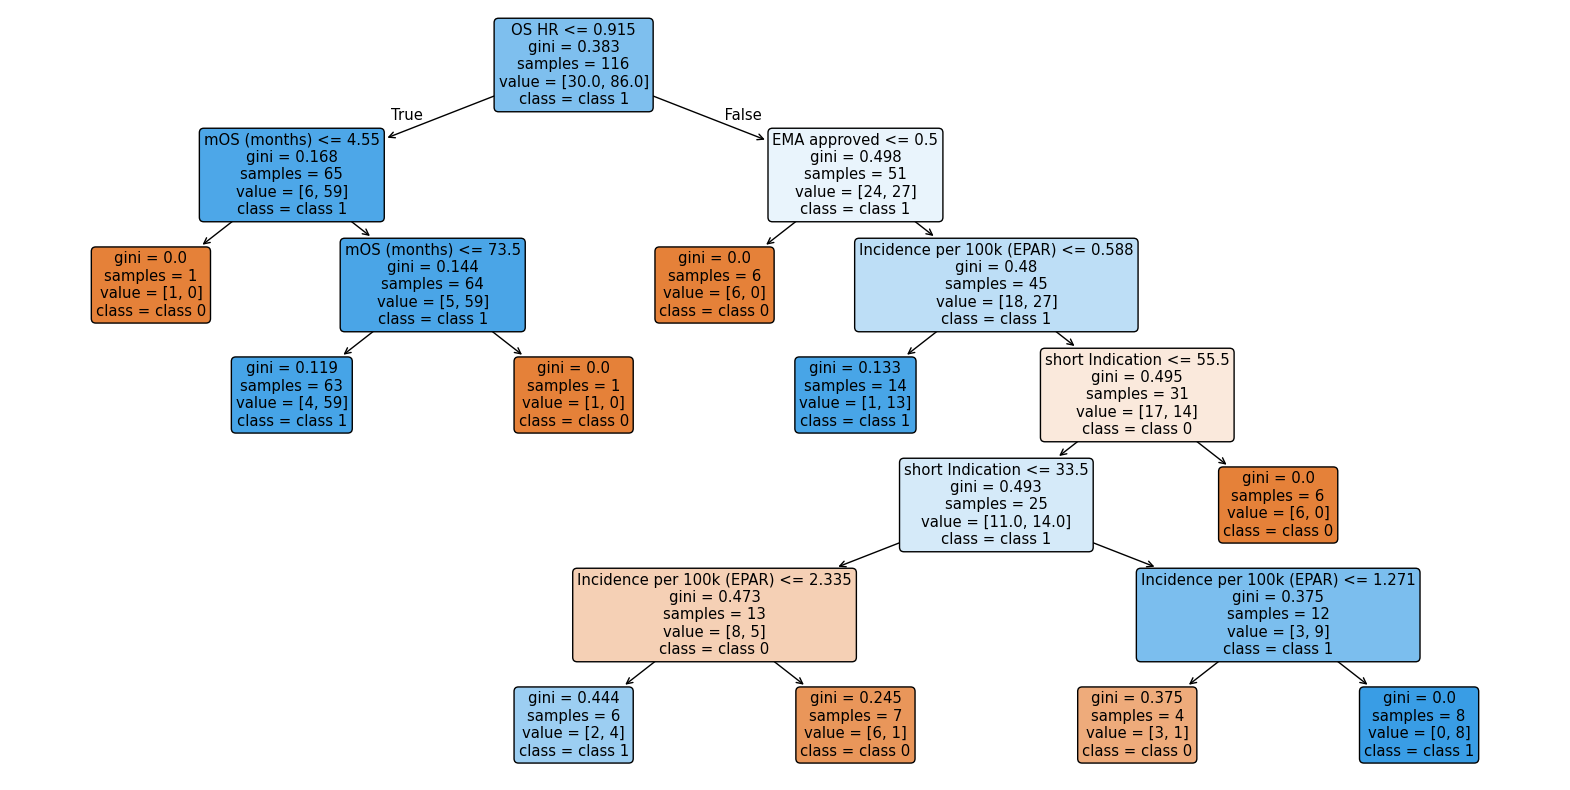

In [56]:
plt.figure(figsize=(20,10)) # Adjust figure size as needed
plot_tree(clf, feature_names=x.columns, class_names=["class 0", "class 1"],filled=True, rounded=True)
plt.show()
